In [1]:
import pandas as pd
import numpy as np
from utils import MusicDataLoader
from collections import Counter

loader = MusicDataLoader()
mus_nodes = loader.get_features(n_release_bins=100)



In [5]:
mus_nodes.sort_values(['network_rank'],ascending=False)[:20]

,id,name,isdone,spotifyid,genres,popularity,followers,histogram,num_release,first_release,last_release,network_rank,in_edges,out_edges
746,11285,Wolfgang Amadeus Mozart,True,4NJhFmfw43RLBLjQvxDuRS,"[classical, classical era]",79.0,4473353.0,"[0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 6, 6, ...",821,1950-01-01,2020-11-06,0.153125,834,834
1855,1021,Ludwig van Beethoven,True,2wOqMjp9TyABvtHdOSOTUS,"[classical, classical era, early romantic era,...",76.0,4323890.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",857,1918-01-01,2020-12-11,0.146233,737,737
3215,12181,Johannes Brahms,True,5wTAi7QkpP6kp8a54lmTOq,"[classical, german romanticism, late romantic ...",68.0,783577.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",359,1917-01-01,2020-11-06,0.135927,609,609
1848,2327,Johann Sebastian Bach,True,5aIqB5nVVvmFsvSdExz408,"[baroque, classical, early music, german baroque]",81.0,3558511.0,"[0, 1, 2, 4, 4, 6, 8, 8, 8, 8, 9, 11, 11, 13, ...",742,1956-03-01,2020-11-13,0.128443,741,741
1851,12438,Franz Schubert,True,2p0UyoPfYfI76PCStuXfOP,"[classical, classical era, early romantic era]",68.0,916434.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, ...",277,1927-01-01,2020-10-02,0.121309,549,549
3210,122653,Пётр Ильич Чайковский,True,3MKCzCnpzw3TjUYs2v7vDA,"[classical, late romantic era, russian romanti...",73.0,1113879.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",411,1926-01-01,2019-12-06,0.119846,492,492
1849,32513,Robert Schumann,True,2UqjDAXnDxejEyE0CzfUrZ,"[classical, early romantic era, german romanti...",65.0,476303.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, ...",162,1960-01-01,2020-11-06,0.118596,489,489
3207,10211,Maurice Ravel,True,17hR0sYHpx7VYTMRfFUOmY,"[classical, impressionism, neoclassicism, post...",64.0,409760.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4, ...",179,1947-01-01,2019-02-01,0.114774,449,449
2721,12299,London Symphony Orchestra,True,5yxyJsFanEAuwSM5kOuZKc,"[british orchestra, classical, classical perfo...",76.0,241664.0,"[0, 2, 4, 4, 7, 7, 9, 11, 12, 12, 12, 14, 14, ...",404,1957-01-01,2020-09-04,0.113760,462,462
3248,10729,Antonín Dvořák,True,6n7nd5iceYpXVwcx8VPpxF,"[classical, czech classical, late romantic era]",63.0,475066.0,"[0, 2, 2, 2, 3, 3, 3, 3, 7, 8, 8, 9, 9, 10, 11...",238,1954-01-01,2020-08-07,0.112431,429,429


Quick look at dataset distribution

In [4]:
print(f'Collected release data between {pd.to_datetime(mus_nodes.first_release).min()} and {pd.to_datetime(mus_nodes.last_release).max()}')
# print
genrecounts = Counter([g for gg in mus_nodes.genres.values.tolist() for g in gg])

print(f'{len(genrecounts)} genres available in dataset')
# print(f'')

Collected release data between 1890-01-01 00:00:00 and 2020-12-31 00:00:00
3031 genres available in dataset


Ok cool, what are our genre distributions looking like then?

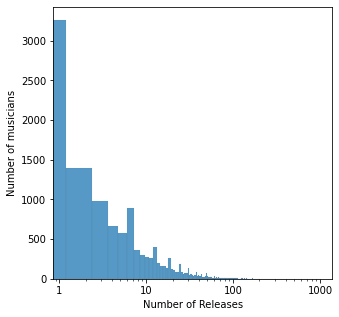

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

fig = sns.histplot(data=mus_nodes,x='num_release')
fig.set(
    xscale='log',
    xlabel='Number of Releases',
    ylabel='Number of musicians',
    # showxticks=''
)

fig.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.get_figure().savefig('pics/features/release_distribution.png',dpi=300)

# sorted(list(Counter(mus_nodes.num_release.values).items()))

In [35]:
released_any = mus_nodes[mus_nodes.num_release > 0]

(released_any.num_release <= 3).sum()/len(released_any)

0.42162248228644217

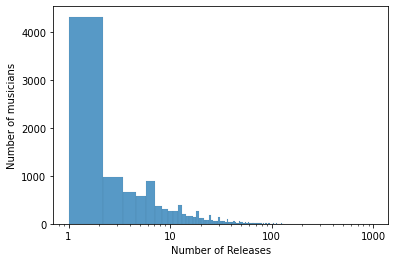

In [34]:
fig = sns.histplot(data=released_any,x='num_release')
fig.set(
    xscale='log',
    xlabel='Number of Releases',
    ylabel='Number of musicians',
    # showxticks=''
)

fig.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
